In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import numpy as np
import arviz as az
from scipy import stats
from matplotlib.lines import Line2D
from IPython.display import Image
from graphviz import Digraph


WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


ModuleNotFoundError: No module named 'graphviz'

## Balloon Analogue Risk Task
In this assignment you are given a dataset from an experiment on the risk taking behavior of humans. The task in the experiment is the Balloon Analogue Risk Task (BART). Participants are presented with virtual balloons through a computer screen. Inflating a balloon increases the amount of reward a participant gets, but they need to stop and cash-in before the balloon bursts. If the balloon bursts, then the offered reward is not added to the total. The goal is to maximize the total reward (see this [video](https://www.youtube.com/watch?v=foy3ZVokjFM) for an example). In this experiment, however, there are balloons of different colors: red, blue, and green. The experiment is designed such that at each trial the program draws an integer from a discrete uniform distribution, which defines the number of pumps at which the balloon will burst at that trial. Distributions for each color is as follows:
$$
maxPump_{red} \sim \text{discreteUniform}(1,16)
\\
maxPump_{green} \sim \text{discreteUniform}(1,32)
\\
maxPump_{blue} \sim \text{discreteUniform}(1,64)
$$
Have a look at the first few rows of the dataset below. For participant #1 we can follow the sequence: the first balloon was blue, and the participant pumped it 20 times, and then cahsed-in without a burst, leading to a gain of 20*5=100 points (i.e. reward). Then it was a green balloon, the subject tried to pump it but the balloon burst at the very first step, so the total was the same. It was the same for the next, the red one. It was followed by a blue balloon with 29 pumps, no burst, 145 gain, leading to total 100+145=245. The green one that followed was pumped 5 times, but at the $6^{th}$ pump it burst.

In [59]:
d = pd.read_csv('BART_data.csv')
d.head()

,subjectId,trialNum,color,nPump,burst,gain,total
0,1,1,blue,20,0,100,100
1,1,2,green,0,1,0,100
2,1,3,red,0,1,0,100
3,1,4,blue,29,0,145,245
4,1,5,green,5,1,0,245


# Data Overview 

**a.** What are the total scores for each participant? Draw a scatter plot where x-axis is the participant ID (number) and the y-axis is the total score. Draw a horizontal line for the average score across all participants. Your output should look like the one below:


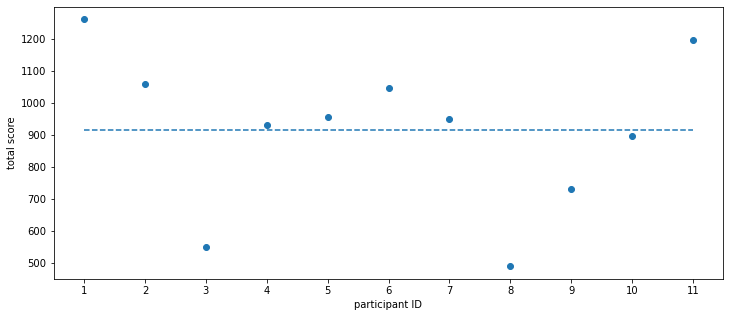

In [7]:
Image('output1.png')

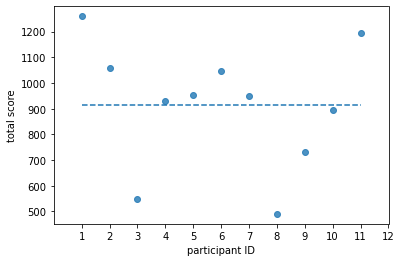

In [17]:
d_1 = d[d['trialNum'] == 30]
x = d_1['subjectId']
y = d_1['total']
y_mean = [np.mean(y) for i in y]



fig, ax = plt.subplots()
ax.set(xlim=(0, 11), xticks=np.arange(1, 13))
ax.scatter(x, y, alpha=0.8)
mean_line = plt.plot(x,y_mean, label='Mean', linestyle='--')
plt.xlabel('participant ID')
plt.ylabel('total score')
plt.show()

**b.** What are the average gain amounts from a trial for each subject? Draw a similar plot where this time the y-axis is the gain amount. For each mean point on the graph, include the errorbars representing the standard error. Be careful, do not to discard trials in which the balloons burst. Use standardized values. Draw the mean gain from a trial, across all participants, as a horizontal line. 
> Standard error of the mean: $\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}$ where n is the sample size and $\sigma$ is the standard deviation.

Your output should like the one below:

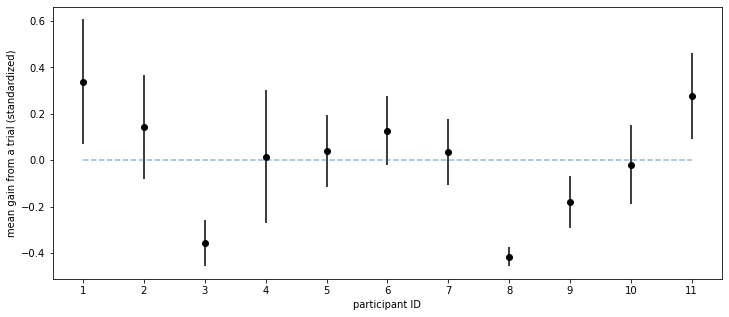

In [9]:
Image('output2.png')

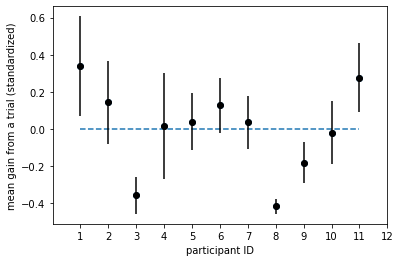

In [15]:
#Lets standardized the data
d['gain_stand'] = (d.gain-d.gain.mean())/d.gain.std()

gain_average = [0]*11
standard_error = [0]*11

for i in range(1,12):
    d_2 = d[d['subjectId'] == i]
    gain_average[i-1] = d_2.gain_stand.mean()
    standard_error[i-1] = d_2.gain_stand.std()/ np.sqrt(30)
    

x = d_1['subjectId']
y = gain_average
y_mean = [np.mean(y) for i in y]
fig, ax = plt.subplots()
plt.scatter(x, y, alpha=0.8)
ax.set(xlim=(0, 11), xticks=np.arange(1, 13))
mean_line = plt.plot(x,y_mean, label='Mean', linestyle='--')
plt.errorbar(x, y, yerr=standard_error, fmt="o",color="black")
plt.xlabel('participant ID')
plt.ylabel('mean gain from a trial (standardized)')
plt.show()
    
   


**c.** Now consider the balloon color. Find the amount of average gain for each color that contributes to the total score, for each participant. Also draw the standard error of those means, for each participant and for each color. Be careful, do not to discard trials in which the balloons burst. Finally, draw the mean contribution of each balloon of different colors, across all participants (i.e three horizontal lines). Use standardized scores. 

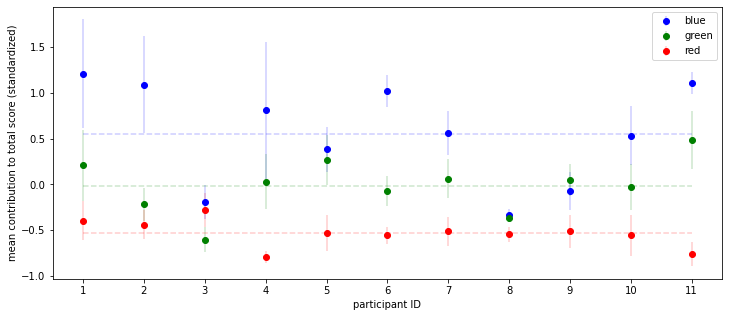

In [11]:
Image('output3.png')

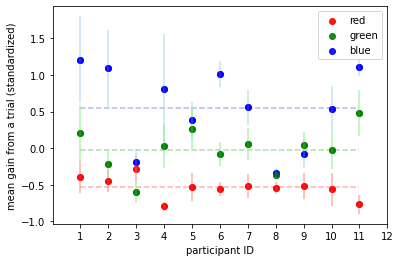

In [12]:

gain_average_blue = [0]*11
standard_error_blue = [0]*11

gain_average_green = [0]*11
standard_error_green = [0]*11

gain_average_red = [0]*11
standard_error_red = [0]*11

for i in range(1,12):
    d_2 = d[d['subjectId'] == i]
    d_2_blue = d_2[d_2['color'] == 'blue']
    gain_average_blue[i-1] = d_2_blue.gain_stand.mean()
    standard_error_blue[i-1] = d_2_blue.gain_stand.std()/ np.sqrt(len(d_2_blue))
    
    d_2_green = d_2[d_2['color'] == 'green']
    gain_average_green[i-1] = d_2_green.gain_stand.mean()
    standard_error_green[i-1] = d_2_green.gain_stand.std()/ np.sqrt(len(d_2_green))
    
    d_2_red = d_2[d_2['color'] == 'red']
    gain_average_red[i-1] = d_2_red.gain_stand.mean()
    standard_error_red[i-1] = d_2_red.gain_stand.std()/ np.sqrt(len(d_2_red))
    
    
x = d_1['subjectId']
y_red = gain_average_red
y_blue = gain_average_blue
y_green= gain_average_green

y_mean_red = [np.mean(y_red) for i in y]
y_mean_blue = [np.mean(y_blue) for i in y]
y_mean_green = [np.mean(y_green) for i in y]

fig, ax = plt.subplots()
ax.scatter(x, y_red, alpha=0.9, color="red", label = 'red')
ax.scatter(x, y_green, alpha=0.9, color="green", label = 'green')
ax.scatter(x, y_blue, alpha=0.9, color="blue", label = 'blue')
ax.set(xlim=(0, 11), xticks=np.arange(1, 13))

mean_line = plt.plot(x,y_mean_red, linestyle='--',color="red", alpha=0.3)
plt.errorbar(x, y_red, yerr=standard_error_red, fmt="o",color="red", alpha=0.5, ecolor = 'tomato')

mean_line = plt.plot(x,y_mean_blue, linestyle='--', color="blue", alpha=0.3)
plt.errorbar(x, y_blue, yerr=standard_error_blue, fmt="o", color="blue", alpha=0.7, ecolor = 'lightblue')

mean_line = plt.plot(x,y_mean_green, linestyle='--', color="green", alpha=0.3)
plt.errorbar(x, y_green, yerr=standard_error_green, fmt="o", color="green", alpha=0.7, ecolor = 'lightgreen')

plt.legend()
plt.xlabel('participant ID')
plt.ylabel('mean gain from a trial (standardized)')
plt.show()

# Modeling Gains 

**a.** First, discard the color and implement a Gaussian model for the relation between actor and gain. Use a Gaussian likelihood and assign a unique Gaussian prior for each actor. Create a model with a weak ($\sigma=1.5$) and another with a strong ($\sigma=0.1$) skeptical prior. Assign suitable priors for the model given below.

Weak prior model:

$$
\begin{align*}
{G}_i &\sim \text{Normal}(\mu_i, \sigma)
\\
\mu_i &= \alpha_{A[i]}
\\
\alpha \sim \text{Normal}(0, 1.5)
\\
\sigma \sim \text{Exponential}(1.5)
\end{align*}
$$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_w, a_w]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


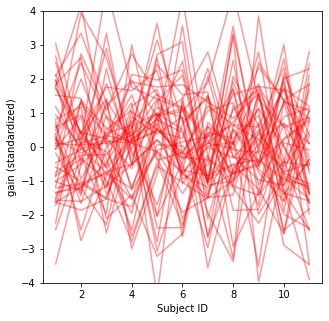

In [19]:
# Write your code here (weak prior)
#Model and prior predictive analysis

with pm.Model() as weak:
    a_w = pm.Normal('a_w', 0, 1.5, shape = 11)
    mu_w = a_w[d.subjectId-1]
    sigma_w = pm.Exponential('sigma_w', 1.5)
    g_w = pm.Normal('g_w', mu_w, sigma_w, observed = d.gain_stand)
    trace_weak = pm.sample(1000, tune=1000, chains = 4, return_inferencedata = True)
    prior_pred_model_weak = pm.sample_prior_predictive()   
    
Aseq = np.linspace(1, 11, 11)
fig, ax = plt.subplots(figsize=(5,5))
for i in range(50):
    y = prior_pred_model_weak['a_w'][i,]
    ax.plot(Aseq, y, "r", alpha = 0.4)
    ax.set_ylim(-4, 4)
    ax.set_xlabel("Subject ID")
    ax.set_ylabel("gain (standardized)")    
    
    

In [21]:
summary_weak = az.summary(trace_weak)
summary_weak

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_w[0],0.336,0.179,0.013,0.679,0.003,0.002,4633.0,3288.0,1.0
a_w[1],0.143,0.178,-0.182,0.475,0.003,0.002,4246.0,3211.0,1.0
a_w[2],-0.349,0.179,-0.686,-0.019,0.003,0.002,4708.0,3055.0,1.0
a_w[3],0.016,0.178,-0.311,0.354,0.002,0.003,5125.0,3217.0,1.0
a_w[4],0.040,0.176,-0.289,0.374,0.002,0.003,5457.0,3270.0,1.0
a_w[5],0.124,0.178,-0.202,0.465,0.003,0.002,4609.0,3187.0,1.0
a_w[6],0.037,0.177,-0.310,0.368,0.003,0.003,4882.0,2961.0,1.0
a_w[7],-0.411,0.181,-0.748,-0.071,0.003,0.002,5217.0,3043.0,1.0
a_w[8],-0.180,0.177,-0.487,0.180,0.002,0.002,5345.0,3126.0,1.0
a_w[9],-0.015,0.179,-0.355,0.322,0.003,0.003,3955.0,2932.0,1.0


array([[<AxesSubplot:title={'center':'a_w\n0'}>,
        <AxesSubplot:title={'center':'a_w\n0'}>],
       [<AxesSubplot:title={'center':'a_w\n1'}>,
        <AxesSubplot:title={'center':'a_w\n1'}>],
       [<AxesSubplot:title={'center':'a_w\n2'}>,
        <AxesSubplot:title={'center':'a_w\n2'}>],
       [<AxesSubplot:title={'center':'a_w\n3'}>,
        <AxesSubplot:title={'center':'a_w\n3'}>],
       [<AxesSubplot:title={'center':'a_w\n4'}>,
        <AxesSubplot:title={'center':'a_w\n4'}>],
       [<AxesSubplot:title={'center':'a_w\n5'}>,
        <AxesSubplot:title={'center':'a_w\n5'}>],
       [<AxesSubplot:title={'center':'a_w\n6'}>,
        <AxesSubplot:title={'center':'a_w\n6'}>],
       [<AxesSubplot:title={'center':'a_w\n7'}>,
        <AxesSubplot:title={'center':'a_w\n7'}>],
       [<AxesSubplot:title={'center':'a_w\n8'}>,
        <AxesSubplot:title={'center':'a_w\n8'}>],
       [<AxesSubplot:title={'center':'a_w\n9'}>,
        <AxesSubplot:title={'center':'a_w\n9'}>],
       [<A

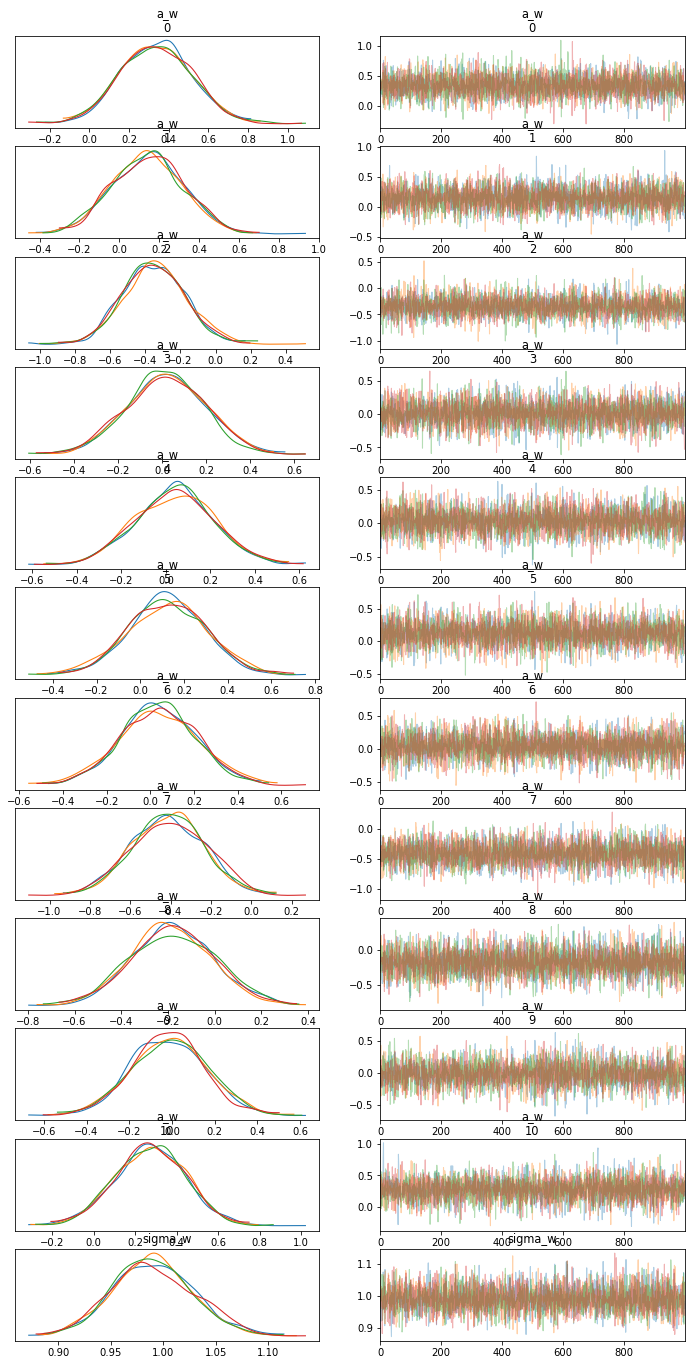

In [22]:
az.plot_trace(trace_weak, compact=False)

Strong prior model:

$$
\begin{align*}
G_i &\sim \text{Normal}(\mu_i, \sigma)
\\
\mu_i &= \alpha_{A[i]}
\\
\alpha_s \sim \text{Normal}(0, 0.1)
\\
\sigma_s \sim \text{Exponential}(0.1)
\end{align*}
$$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_s, a_s]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


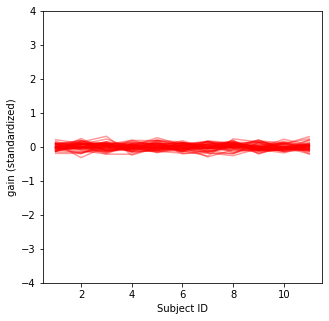

In [24]:
# Write your code here (strong prior)
#Model and prior predictive analysis
with pm.Model() as strong:
    a_s = pm.Normal('a_s',0, 0.1, shape=11)
    mu_s = a_s[d.subjectId-1]
    sigma_s = pm.Exponential('sigma_s', 0.1)
    g_s = pm.Normal('g_s', mu_s, sigma_s, observed = d.gain_stand)
    trace_strong = pm.sample(1000, tune=1000, chains = 4, return_inferencedata = True)
    prior_pred_model_strong = pm.sample_prior_predictive() 
    
Aseq = np.linspace(1, 11, 11)
fig, ax = plt.subplots(figsize=(5,5))
for i in range(50):
    y = prior_pred_model_strong['a_s'][i,]
    ax.plot(Aseq, y, "r", alpha = 0.4) 
    ax.set_ylim(-4, 4)
    ax.set_xlabel("Subject ID")
    ax.set_ylabel("gain (standardized)")        

In [25]:
summary_strong = az.summary(trace_strong)
summary_strong

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_s[0],0.079,0.087,-0.088,0.242,0.001,0.001,4542.0,2892.0,1.0
a_s[1],0.034,0.083,-0.115,0.196,0.001,0.001,5628.0,3349.0,1.0
a_s[2],-0.082,0.086,-0.243,0.077,0.001,0.001,5185.0,3112.0,1.0
a_s[3],0.003,0.086,-0.157,0.164,0.001,0.001,4731.0,3278.0,1.0
a_s[4],0.009,0.087,-0.154,0.175,0.001,0.001,4839.0,2808.0,1.0
a_s[5],0.030,0.089,-0.131,0.200,0.001,0.001,4984.0,3318.0,1.0
a_s[6],0.009,0.088,-0.153,0.178,0.001,0.001,4911.0,3058.0,1.0
a_s[7],-0.096,0.087,-0.251,0.074,0.001,0.001,5622.0,3287.0,1.0
a_s[8],-0.044,0.087,-0.214,0.111,0.001,0.001,5753.0,3416.0,1.0
a_s[9],-0.005,0.088,-0.163,0.167,0.001,0.001,5846.0,3327.0,1.0


array([[<AxesSubplot:title={'center':'a_s\n0'}>,
        <AxesSubplot:title={'center':'a_s\n0'}>],
       [<AxesSubplot:title={'center':'a_s\n1'}>,
        <AxesSubplot:title={'center':'a_s\n1'}>],
       [<AxesSubplot:title={'center':'a_s\n2'}>,
        <AxesSubplot:title={'center':'a_s\n2'}>],
       [<AxesSubplot:title={'center':'a_s\n3'}>,
        <AxesSubplot:title={'center':'a_s\n3'}>],
       [<AxesSubplot:title={'center':'a_s\n4'}>,
        <AxesSubplot:title={'center':'a_s\n4'}>],
       [<AxesSubplot:title={'center':'a_s\n5'}>,
        <AxesSubplot:title={'center':'a_s\n5'}>],
       [<AxesSubplot:title={'center':'a_s\n6'}>,
        <AxesSubplot:title={'center':'a_s\n6'}>],
       [<AxesSubplot:title={'center':'a_s\n7'}>,
        <AxesSubplot:title={'center':'a_s\n7'}>],
       [<AxesSubplot:title={'center':'a_s\n8'}>,
        <AxesSubplot:title={'center':'a_s\n8'}>],
       [<AxesSubplot:title={'center':'a_s\n9'}>,
        <AxesSubplot:title={'center':'a_s\n9'}>],
       [<A

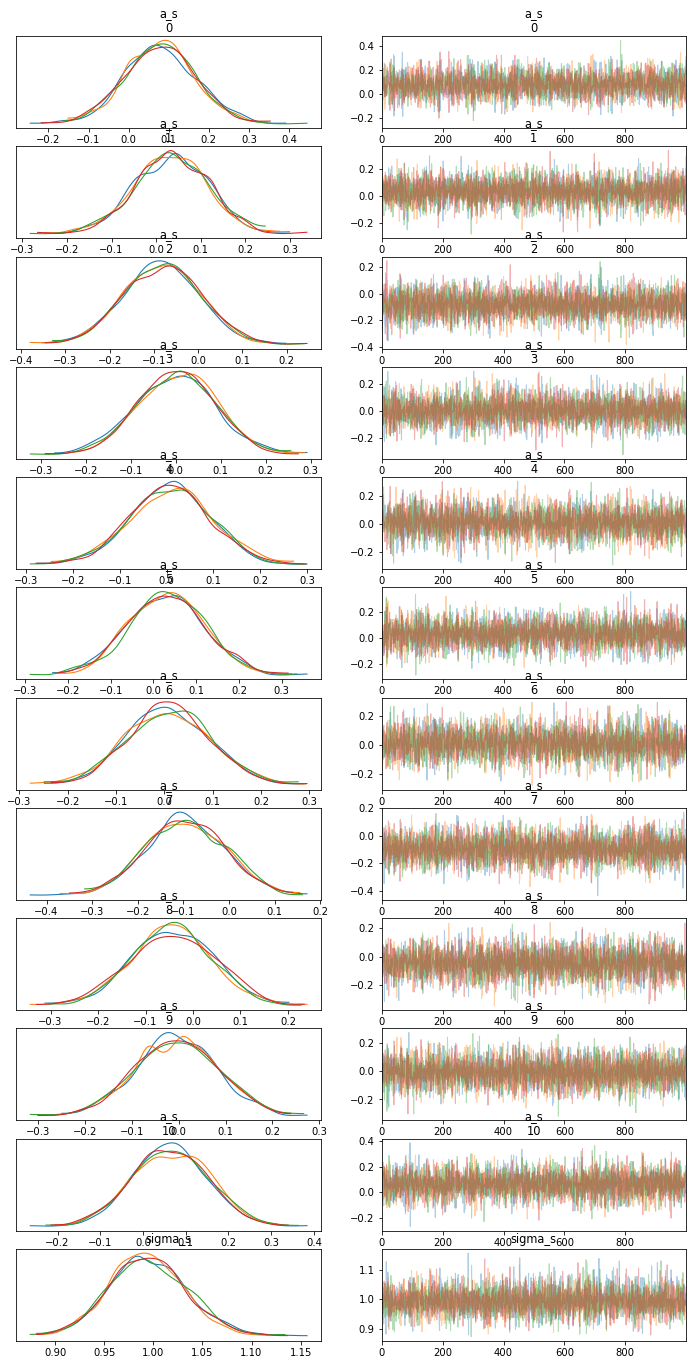

In [26]:
az.plot_trace(trace_strong, compact=False)

**b.** Is it possible to learn the strength of the prior from the data itself? If so, implement an appropriate hierarchical model and compare this model with the two in part *a* in terms of a predictive criterion. It is likely that you'll encounter some problems with this new model (since it is centered). Modify it as necessary (reparameterize to be non-centered). For each actor, plot the estimated means from each model on top of sample means. Use 89% HDI as errorbars on your estimated values. What seems to be the difference between these models. How $\sigma$ value affects model fit? 

Hierarchical version (centered):

$$
\begin{align*}
G_i &\sim \text{Normal}(\mu_i, \sigma)
\\
\mu_i &= \alpha_{A[i]}
\\
\alpha_j &  \sim \text{Normal} (\bar{\alpha} , \sigma_{a})
\\
\bar{\alpha} &\sim \text{Normal}(0, 1.5)
\\
\sigma_{a}  &\sim\text{Exponential}(1.5)
\\
\sigma    &\sim\text{Exponential}(1.5)
\end{align*}
$$

In [27]:
# Write your code here (centered model)

with pm.Model() as centered:
    a_bar = pm.Normal('a_bar',0, 1.5)
    sigma_a = pm.Exponential('sigma_a', 1.5)
    a = pm.Normal('a', a_bar, sigma_a, shape=11)
    sigma = pm.Exponential('sigma', 1.5)
    mu = a[d.subjectId-1]
    g = pm.Normal('g', mu, sigma, observed = d.gain_stand)
    trace_centered = pm.sample(1000, tune=1000, chains = 4, return_inferencedata = True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, a, sigma_a, a_bar]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [30]:
summary_centered = az.summary(trace_centered, var_names = 'a')
summary_centered

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],0.152,0.146,-0.123,0.421,0.005,0.003,913.0,2417.0,1.0
a[1],0.063,0.130,-0.163,0.322,0.003,0.002,2583.0,2420.0,1.0
a[2],-0.159,0.150,-0.437,0.112,0.005,0.003,1045.0,1878.0,1.0
a[3],0.005,0.129,-0.240,0.251,0.003,0.002,2154.0,2531.0,1.0
a[4],0.019,0.130,-0.214,0.278,0.002,0.002,2825.0,2551.0,1.0
a[5],0.062,0.135,-0.184,0.324,0.003,0.002,1985.0,2377.0,1.0
a[6],0.017,0.129,-0.221,0.273,0.003,0.002,1859.0,2504.0,1.0
a[7],-0.185,0.155,-0.462,0.109,0.005,0.003,1039.0,1451.0,1.0
a[8],-0.078,0.136,-0.335,0.170,0.003,0.002,1985.0,2291.0,1.0
a[9],-0.005,0.128,-0.232,0.258,0.002,0.002,2751.0,2542.0,1.0


In [31]:
az.summary(trace_centered)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,0.003,0.083,-0.152,0.155,0.002,0.002,1298.0,2286.0,1.00
a[0],0.152,0.146,-0.123,0.421,0.005,0.003,913.0,2417.0,1.00
a[1],0.063,0.130,-0.163,0.322,0.003,0.002,2583.0,2420.0,1.00
a[2],-0.159,0.150,-0.437,0.112,0.005,0.003,1045.0,1878.0,1.00
a[3],0.005,0.129,-0.240,0.251,0.003,0.002,2154.0,2531.0,1.00
a[4],0.019,0.130,-0.214,0.278,0.002,0.002,2825.0,2551.0,1.00
a[5],0.062,0.135,-0.184,0.324,0.003,0.002,1985.0,2377.0,1.00
a[6],0.017,0.129,-0.221,0.273,0.003,0.002,1859.0,2504.0,1.00
a[7],-0.185,0.155,-0.462,0.109,0.005,0.003,1039.0,1451.0,1.00
a[8],-0.078,0.136,-0.335,0.170,0.003,0.002,1985.0,2291.0,1.00


array([[<AxesSubplot:title={'center':'a_bar'}>,
        <AxesSubplot:title={'center':'a_bar'}>],
       [<AxesSubplot:title={'center':'a\n0'}>,
        <AxesSubplot:title={'center':'a\n0'}>],
       [<AxesSubplot:title={'center':'a\n1'}>,
        <AxesSubplot:title={'center':'a\n1'}>],
       [<AxesSubplot:title={'center':'a\n2'}>,
        <AxesSubplot:title={'center':'a\n2'}>],
       [<AxesSubplot:title={'center':'a\n3'}>,
        <AxesSubplot:title={'center':'a\n3'}>],
       [<AxesSubplot:title={'center':'a\n4'}>,
        <AxesSubplot:title={'center':'a\n4'}>],
       [<AxesSubplot:title={'center':'a\n5'}>,
        <AxesSubplot:title={'center':'a\n5'}>],
       [<AxesSubplot:title={'center':'a\n6'}>,
        <AxesSubplot:title={'center':'a\n6'}>],
       [<AxesSubplot:title={'center':'a\n7'}>,
        <AxesSubplot:title={'center':'a\n7'}>],
       [<AxesSubplot:title={'center':'a\n8'}>,
        <AxesSubplot:title={'center':'a\n8'}>],
       [<AxesSubplot:title={'center':'a\n9'}>,
 

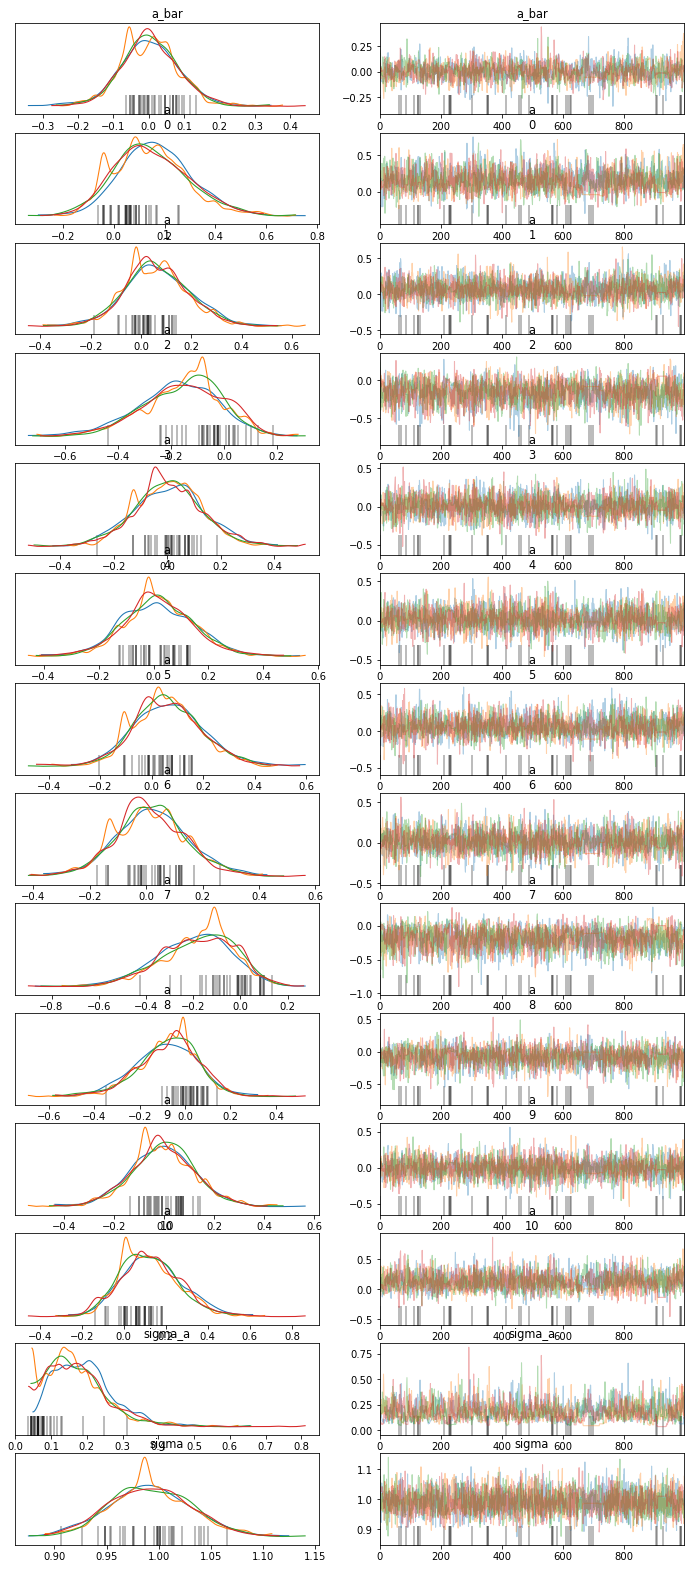

In [32]:
az.plot_trace(trace_centered, compact=False)

Hierarchical version (non-centered):

$$
\begin{align*}
G_i &\sim \text{Normal}(\mu_i, \sigma)
\\
\mu_i &= \bar \alpha + z_{A[i]} \times \sigma_{a}
\\
\bar \alpha &  \sim \text{Normal}(0 , 1.5)
\\
z_j &  \sim \text{Normal}(0 , 1)
\\ 
\sigma_{a}  &\sim\text{Exponential}(1.5)
\\ 
\sigma  &\sim\text{Exponential}(1.5)
\end{align*}
$$

In [33]:
# Write your code here (non-centered model)
with pm.Model() as non_centered:
    z = pm.Normal('z', 0.0, 1.0, shape = 11)
    a_bar = pm.Normal('a_bar', 0.0, 1.5)
    sigma_a = pm.Exponential('sigma_a', 1.5)
    mu = a_bar + z[d.subjectId-1]*sigma_a
    sigma = pm.Exponential('sigma', 1.5)
    g = pm.Normal('g', mu, sigma, observed = d.gain_stand)
    trace_non_centered = pm.sample(1000, tune=1000, chains = 4, return_inferencedata = True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, sigma_a, a_bar, z]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.684760726355672, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8830057191219108, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [37]:
summary_non_centered = az.summary(trace_non_centered, var_names= "z")
summary_non_centered

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.738,0.838,-0.833,2.330,0.019,0.013,1993.0,2020.0,1.0
z[1],0.313,0.813,-1.253,1.782,0.018,0.014,2080.0,2192.0,1.0
z[2],-0.832,0.821,-2.479,0.623,0.020,0.015,1771.0,1865.0,1.0
z[3],0.014,0.793,-1.519,1.471,0.017,0.013,2121.0,2397.0,1.0
z[4],0.084,0.767,-1.477,1.441,0.018,0.015,1810.0,1817.0,1.0
z[5],0.271,0.801,-1.216,1.776,0.017,0.014,2217.0,2323.0,1.0
z[6],0.085,0.804,-1.424,1.652,0.017,0.015,2204.0,1977.0,1.0
z[7],-0.947,0.836,-2.440,0.750,0.019,0.014,1898.0,1996.0,1.0
z[8],-0.430,0.797,-2.001,1.030,0.018,0.014,1998.0,2216.0,1.0
z[9],-0.046,0.773,-1.506,1.417,0.016,0.013,2317.0,2168.0,1.0


In [38]:
az.summary(trace_non_centered)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.738,0.838,-0.833,2.330,0.019,0.013,1993.0,2020.0,1.00
z[1],0.313,0.813,-1.253,1.782,0.018,0.014,2080.0,2192.0,1.00
z[2],-0.832,0.821,-2.479,0.623,0.020,0.015,1771.0,1865.0,1.00
z[3],0.014,0.793,-1.519,1.471,0.017,0.013,2121.0,2397.0,1.00
z[4],0.084,0.767,-1.477,1.441,0.018,0.015,1810.0,1817.0,1.00
z[5],0.271,0.801,-1.216,1.776,0.017,0.014,2217.0,2323.0,1.00
z[6],0.085,0.804,-1.424,1.652,0.017,0.015,2204.0,1977.0,1.00
z[7],-0.947,0.836,-2.440,0.750,0.019,0.014,1898.0,1996.0,1.00
z[8],-0.430,0.797,-2.001,1.030,0.018,0.014,1998.0,2216.0,1.00
z[9],-0.046,0.773,-1.506,1.417,0.016,0.013,2317.0,2168.0,1.00


In [36]:
# Write your code here (model comparison)
az.compare({"centered": trace_centered, "non-centered": trace_non_centered}, ic ="waic", scale = "deviance")

/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
centered,0,942.639107,11.063308,0.000000,1.0,62.066699,0.000000,True,deviance
non-centered,1,942.967446,10.947088,0.328338,0.0,62.045135,0.486131,True,deviance


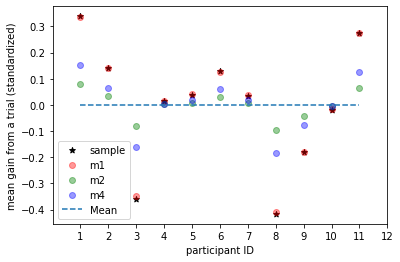

In [48]:
# Write your code here (plots) [Hint: your plot should look like the one below]

gain_model_1 = [0]*11
gain_model_2 = [0]*11 
gain_model_4 = [0]*11
gain_average = [0]*11


for i in range(0,11):
    
    gain_model_1[i] = summary_weak.iloc[i,0]
    
    gain_model_2[i] = summary_strong.iloc[i,0]
    
    gain_model_4[i] = summary_centered.iloc[i,0]
    
for i in range(1,12):
    d_2 = d[d['subjectId'] == i]
    gain_average[i-1] = d_2.gain_stand.mean()    
    
x = d_1['subjectId']
y_m1 = gain_model_1
y_m2 = gain_model_2
y_m4= gain_model_4
y = gain_average
y_mean = [np.mean(y) for i in y]

fig, ax = plt.subplots()
ax.scatter(x, y, marker="*", color="black", label = "sample")
ax.scatter(x, y_m1, alpha=0.4, color="red", label = 'm1')
ax.scatter(x, y_m2, alpha=0.4, color="green", label = 'm2')
ax.scatter(x, y_m4, alpha=0.4, color="blue", label = 'm4')
ax.set(xlim=(0, 11), xticks=np.arange(1, 13))

mean_line = plt.plot(x,y_mean, label='Mean', linestyle='--')

plt.legend()
plt.xlabel('participant ID')
plt.ylabel('mean gain from a trial (standardized)')
plt.show()    

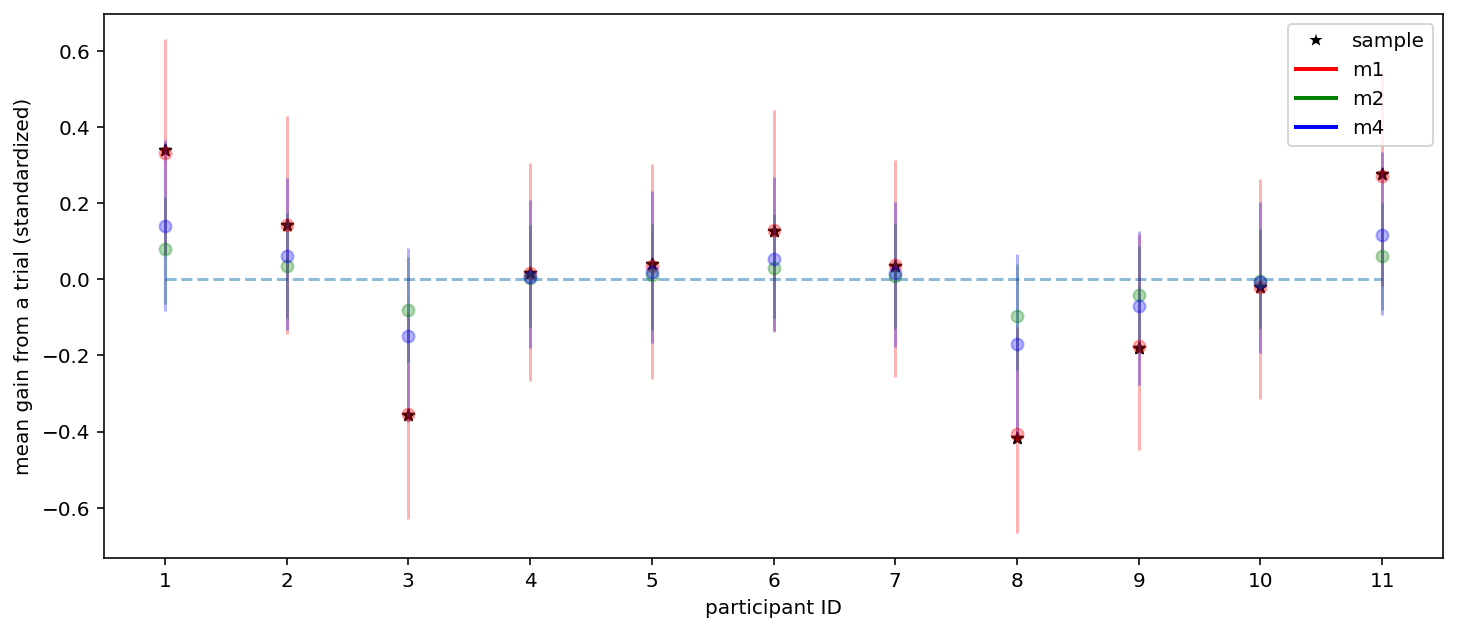

In [20]:
Image('output4.png')

**c.** Note that the experiment has 3 treatments (i.e. 3 different balloon colors). Create a model for the gains, but this time add a term for the treatments (i.e. consider treatments as another cluster). Implement a non-centered version. Plot the posterior distributions for treatment intercepts. How do you interpret them? 

The non-centered model:

$$
\begin{align*}
G_i &\sim \text{Normal}(\mu_i, \sigma)
\\
\mu_i &= \bar{\alpha} +  \text{z}_{A[i]} \times \sigma_{\alpha} + \beta_{T[i]}
\\
\bar \alpha &  \sim \text{Normal}(0 , 1)
\\
z_{a} &  \sim \text{Normal}(0 , 1.5)
\\ 
z_{b} &  \sim \text{Normal}(0 , 1.5)
\\
\sigma_{a}, \sigma_{b}, \sigma_{G}   &\sim\text{Exponential}(1.5)
\end{align*}
$$

In [50]:
# Write your code here (non-centered model)

d["c"]=d['color']
d['c'] = pd.factorize(d['c'])[0]
d.head()

#Here, blue is 0, green is 1 and red is 2

with pm.Model() as color:
    sigma_a = pm.Exponential('sigma_a', 1.5)
    sigma_b = pm.Exponential('sigma_b', 1.5)
    sigma_g = pm.Exponential('sigma_g', 1.5)
    z_a = pm.Normal('z_a', mu = 0, sigma = 1.5, shape=11)
    z_b = pm.Normal('z_b', mu = 0, sigma = 1.5, shape=3)
    a_bar = pm.Normal('_bar', mu = 0, sigma = 1)
    mu = a_bar + z_a[d.subjectId-1] * sigma_a + z_b[d.c] * sigma_b
    g = pm.Normal("g", mu = mu, sigma = sigma_g, observed = d.gain_stand)
    trace_color = pm.sample(1000, tune=2000, chains=4, return_inferencedata = True, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [_bar, z_b, z_a, sigma_g, sigma_b, sigma_a]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 58 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


array([<AxesSubplot:title={'center':'z_b\n0'}>,
       <AxesSubplot:title={'center':'z_b\n1'}>,
       <AxesSubplot:title={'center':'z_b\n2'}>], dtype=object)

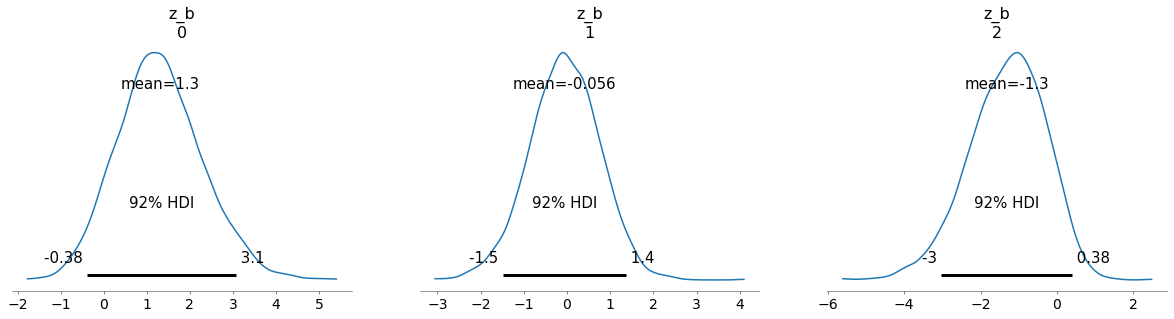

In [51]:
# Write your code here (for posterior distributions)
with pm.Model() as color:
    pm.sample_posterior_predictive(trace_color)
    
az.plot_posterior(trace_color ,hdi_prob=0.92, var_names=["z_b"])    

In [52]:
az.summary(trace_color)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z_a[0],1.416,1.154,-0.838,3.578,0.017,0.015,4843.0,2566.0,1.0
z_a[1],0.600,1.113,-1.487,2.685,0.017,0.017,4480.0,2573.0,1.0
z_a[2],-1.470,1.127,-3.506,0.862,0.017,0.014,4538.0,2066.0,1.0
z_a[3],0.071,1.100,-2.030,2.082,0.015,0.020,5057.0,3091.0,1.0
z_a[4],0.166,1.089,-1.866,2.208,0.016,0.018,4837.0,2877.0,1.0
z_a[5],0.556,1.126,-1.589,2.697,0.016,0.020,5191.0,2559.0,1.0
z_a[6],0.132,1.089,-1.915,2.188,0.016,0.018,4639.0,2805.0,1.0
z_a[7],-1.713,1.133,-3.945,0.304,0.017,0.013,4602.0,2705.0,1.0
z_a[8],-0.701,1.118,-2.842,1.370,0.016,0.016,4695.0,2738.0,1.0
z_a[9],-0.075,1.124,-2.202,2.063,0.016,0.019,4970.0,2754.0,1.0


array([[<AxesSubplot:title={'center':'z_a\n0'}>,
        <AxesSubplot:title={'center':'z_a\n0'}>],
       [<AxesSubplot:title={'center':'z_a\n1'}>,
        <AxesSubplot:title={'center':'z_a\n1'}>],
       [<AxesSubplot:title={'center':'z_a\n2'}>,
        <AxesSubplot:title={'center':'z_a\n2'}>],
       [<AxesSubplot:title={'center':'z_a\n3'}>,
        <AxesSubplot:title={'center':'z_a\n3'}>],
       [<AxesSubplot:title={'center':'z_a\n4'}>,
        <AxesSubplot:title={'center':'z_a\n4'}>],
       [<AxesSubplot:title={'center':'z_a\n5'}>,
        <AxesSubplot:title={'center':'z_a\n5'}>],
       [<AxesSubplot:title={'center':'z_a\n6'}>,
        <AxesSubplot:title={'center':'z_a\n6'}>],
       [<AxesSubplot:title={'center':'z_a\n7'}>,
        <AxesSubplot:title={'center':'z_a\n7'}>],
       [<AxesSubplot:title={'center':'z_a\n8'}>,
        <AxesSubplot:title={'center':'z_a\n8'}>],
       [<AxesSubplot:title={'center':'z_a\n9'}>,
        <AxesSubplot:title={'center':'z_a\n9'}>],
       [<A

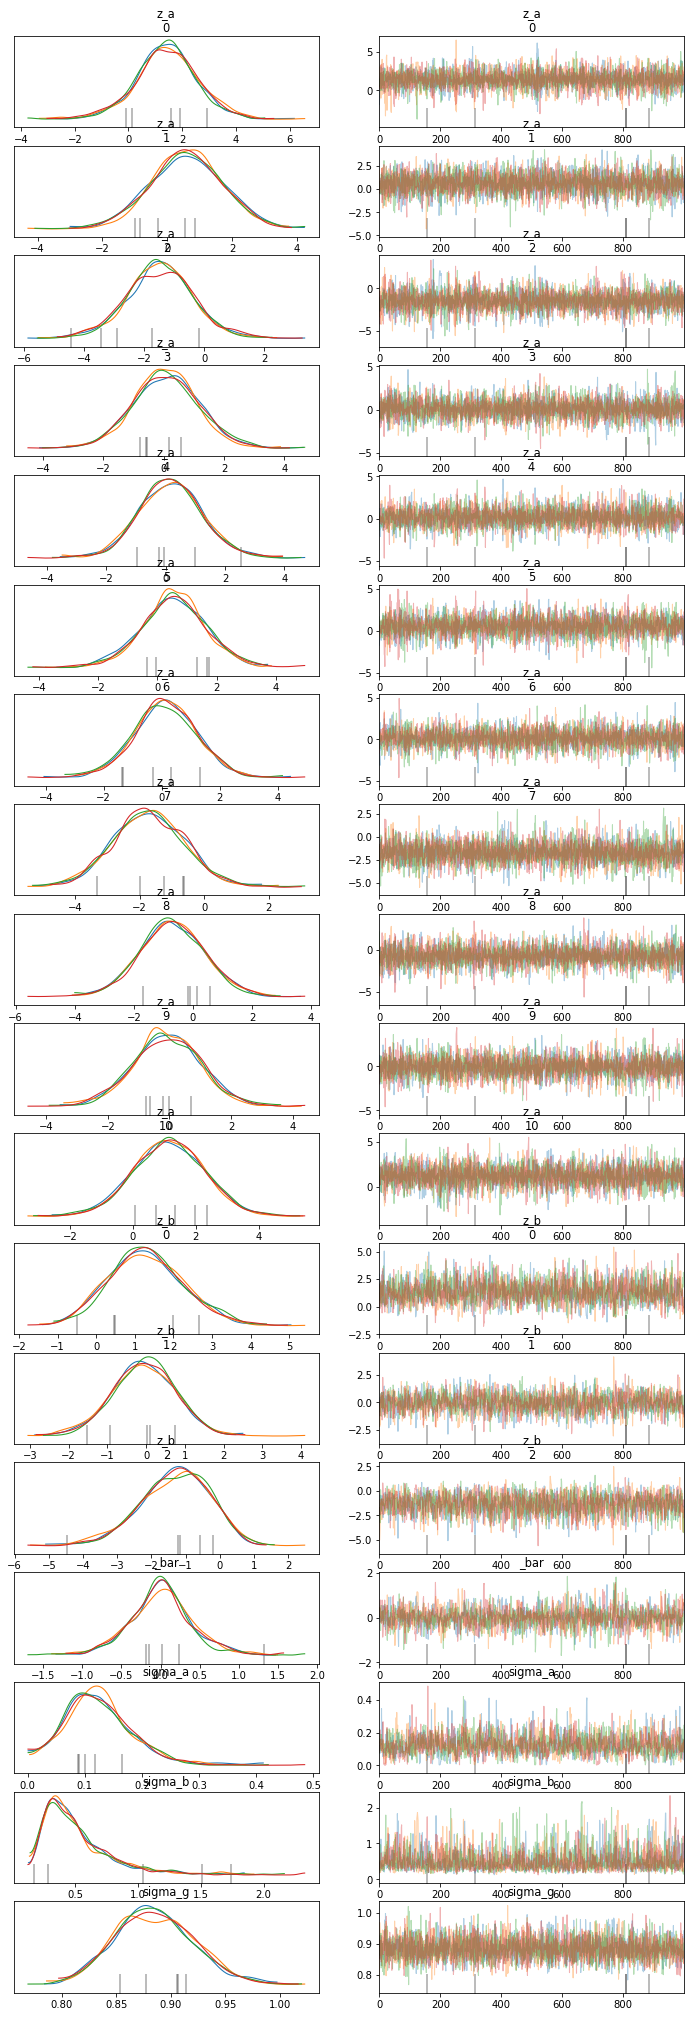

In [53]:
az.plot_trace(trace_color, compact=False)

**d.** When we've plotted the gains for different colors of balloons, we've seen that not all actors are similarly affected by the color treatment. In the previous model we added the treatment term as a single parameter. Now modify your model which can account for the covarying actor-treatment effects. (Hint: you need to use a multivariate normal distribution). In other words, take balloon color to be a feature, rather than a cluster. Again, since the centered version probably will not sample adequately, implement a non-centered version. 
- Plot the estimated mean for each actor, as you did before. How this model, which can account for covariance, is different from the previous model where the treatment effects were not considered at all. Compare the two using a predictive criterion.
- Visualize the estimated covariance term. Plot the sample means for gains from each balloon color, for each participant (as you did before), and plot the estimated means.

The non-centered model:
$$
\begin{align*}
G_i &\sim \text{Normal}(\mu_i, \sigma_{g})
\\
\mu_i &= \bar{\alpha}_{A[i]} +  \alpha_{A[i],T[i]} 
\\ 
\alpha &= (\text{diag}(\pmb S_A) \pmb L_A \pmb Z_{T,A})^T
\\
\pmb Z_{T,A} & \sim \text{Normal}(0,1.5)
\\
z_{\bar A,j} &\sim \text{Normal}(0,1.5)
\\
\bar \alpha &= z_{\bar A,j} \tau_A
\\
S_{A,j}, \tau_A &\sim \text{Exponential}(1.5) \qquad \text{for} \ j \in 1..3
\\ 
\pmb R_A &\sim \text{LKJcorr}(4)
\\
\sigma_{g} &\sim \text{Exponential}(1.5)
\end{align*}
$$

In [56]:
# Write your code here (non-centered model)
with pm.Model() as color_mlv:
    
    sigma = pm.Exponential.dist(1.5)
    chol_actor, _, _ = pm.LKJCholeskyCov("chol_actor", n = 3, eta = 3, sd_dist = sigma, compute_corr = True)
    chol_block, _, _ = pm.LKJCholeskyCov("chol_block", n = 3, eta = 3, sd_dist = sigma, compute_corr = True)

    tau_A = pm.Exponential('tau_A', 1)


    z_A = pm.Normal("z_A", 0, 1, shape = 11)


    a_bar = z_A * tau_A

    sigma_g = pm.Exponential("sigma_g", 1.5)

    z_actor = pm.Normal("z_actor", 0, 1, shape = (3,11))
    a = pm.math.dot(chol_actor, z_actor).T

    
    mu = a_bar[d.subjectId-1] + a[d.subjectId-1, d.c]
    G = pm.Normal("G", mu = mu, sigma = sigma_g, observed = d.gain_stand)
    
    trace_color_mlv = pm.sample(4000, tune = 4000,  target_accept=0.9, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_actor, sigma_g, z_A, tau_A, chol_block, chol_actor]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 4_000 tune and 4_000 draw iterations (16_000 + 16_000 draws total) took 181 seconds.
The acceptance probability does not match the target. It is 0.807573354062514, but should be close to 0.9. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7658177972378234, but should be close to 0.9. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


In [57]:
az.summary(trace_color_mlv)

/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z_A[0],0.306,0.913,-1.441,2.023,0.027,0.019,1182.0,1473.0,1.01
z_A[1],-0.052,0.891,-1.760,1.641,0.013,0.011,4758.0,4121.0,1.00
z_A[2],-0.650,0.929,-2.338,1.120,0.019,0.013,2357.0,4076.0,1.00
z_A[3],-0.091,0.876,-1.826,1.517,0.018,0.013,2238.0,4097.0,1.00
z_A[4],0.107,0.866,-1.584,1.731,0.010,0.010,6861.0,5308.0,1.00
...,...,...,...,...,...,...,...,...,...
"chol_block_corr[2, 0]",-0.011,0.351,-0.627,0.646,0.005,0.004,4771.0,4175.0,1.00
"chol_block_corr[2, 1]",0.011,0.351,-0.628,0.654,0.007,0.005,3121.0,6477.0,1.00
"chol_block_corr[2, 2]",1.000,0.000,1.000,1.000,0.000,0.000,12331.0,11932.0,1.00
tau_A,0.116,0.085,0.000,0.262,0.002,0.001,2361.0,3752.0,1.01


/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/plots/traceplot.py:212: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (82), generating only 20 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'z_A\n0'}>,
        <AxesSubplot:title={'center':'z_A\n0'}>],
       [<AxesSubplot:title={'center':'z_A\n1'}>,
        <AxesSubplot:title={'center':'z_A\n1'}>],
       [<AxesSubplot:title={'center':'z_A\n2'}>,
        <AxesSubplot:title={'center':'z_A\n2'}>],
       [<AxesSubplot:title={'center':'z_A\n3'}>,
        <AxesSubplot:title={'center':'z_A\n3'}>],
       [<AxesSubplot:title={'center':'z_A\n4'}>,
        <AxesSubplot:title={'center':'z_A\n4'}>],
       [<AxesSubplot:title={'center':'z_A\n5'}>,
        <AxesSubplot:title={'center':'z_A\n5'}>],
       [<AxesSubplot:title={'center':'z_A\n6'}>,
        <AxesSubplot:title={'center':'z_A\n6'}>],
       [<AxesSubplot:title={'center':'z_A\n7'}>,
        <AxesSubplot:title={'center':'z_A\n7'}>],
       [<AxesSubplot:title={'center':'z_A\n8'}>,
        <AxesSubplot:title={'center':'z_A\n8'}>],
       [<AxesSubplot:title={'center':'z_A\n9'}>,
        <AxesSubplot:title={'center':'z_A\n9'}>],
       [<A

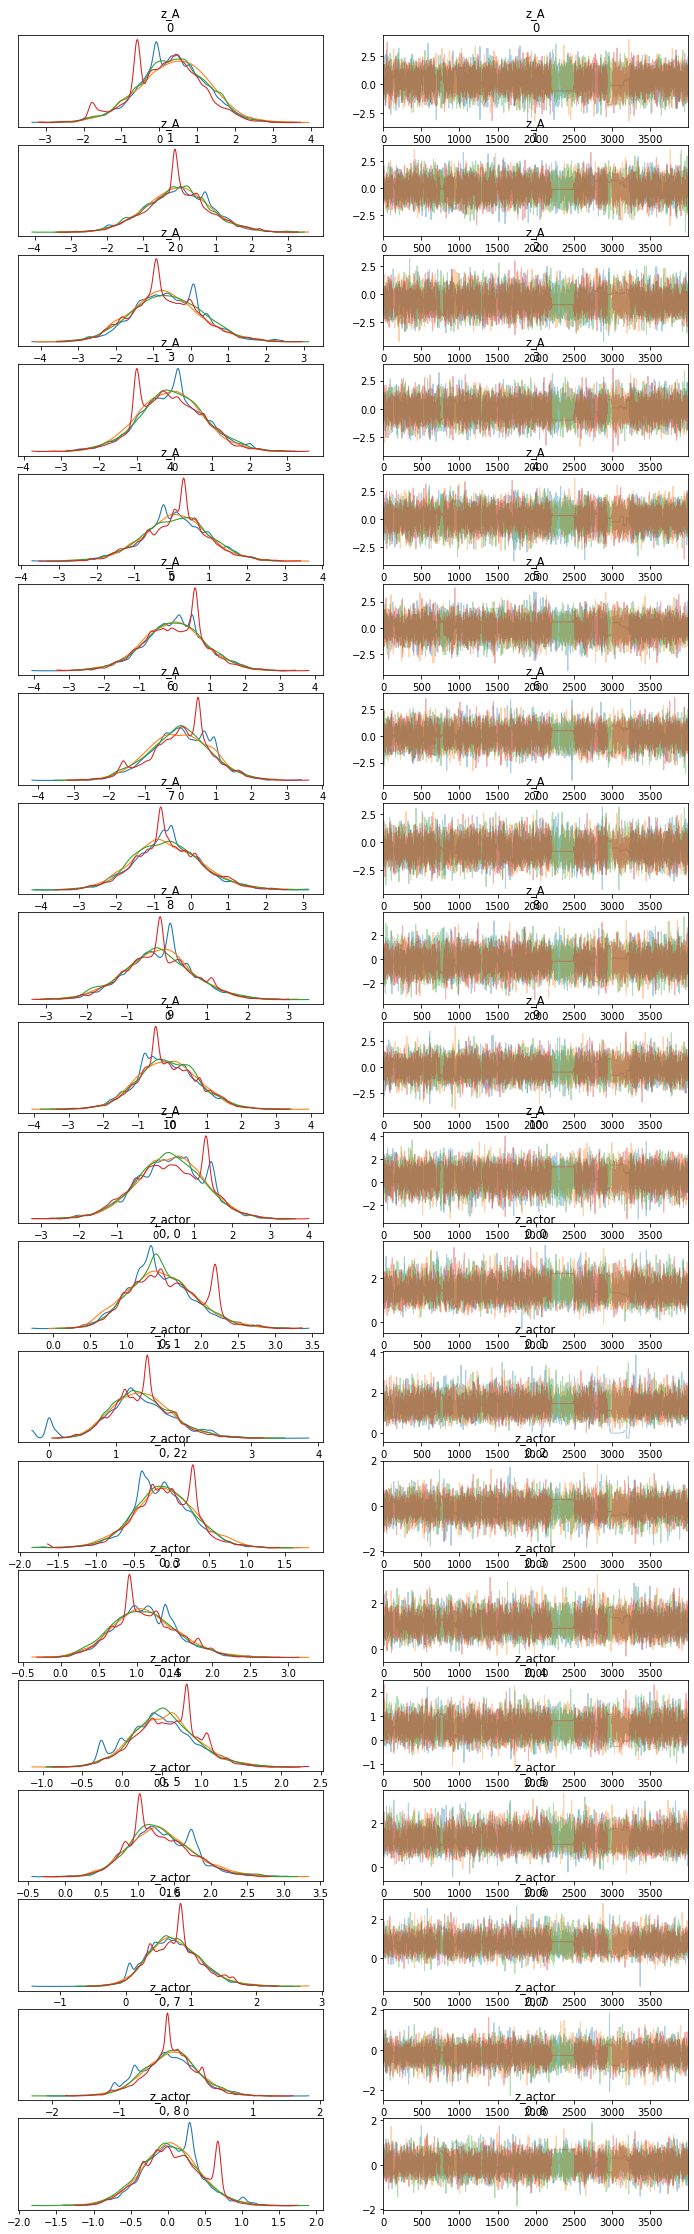

In [58]:
az.plot_trace(trace_color_mlv, compact=False)